<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [71]:
import random
import numpy as np
import pandas as pd
from scipy.fftpack import fft
from scipy.io import wavfile
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('./data/data_v_7_stc/meta/fold1_train.txt', sep='\t')

In [24]:
df.iloc[:, 4].value_counts()

door             2732
tool             1327
knocking_door    1324
bags              988
keyboard          980
background        899
ring              570
speech            220
Name: background, dtype: int64

In [25]:
df.head(2)

,background_0001.wav,office,0.0,9.4585,background
0,background_0001_time_stretch_1.wav,office,0.0,9.879410,background
1,background_0001_time_stretch_10.wav,office,0.0,11.156553,background


In [29]:
df.columns = ['filename', 'xz1', 'xz2', 'time', 'class']

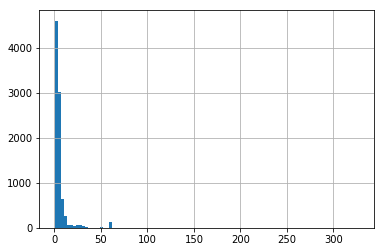

In [59]:
df['time'].hist(bins=100)

In [61]:
df['time'].min()

0.123446712018

In [62]:
df[df['time'] < 1.].shape

(696, 5)

In [64]:
df[df['time'] < 1.]['class'].value_counts()

door        665
ring         16
keyboard     12
bags          3
Name: class, dtype: int64

In [65]:
df['class'].value_counts()

door             2732
tool             1327
knocking_door    1324
bags              988
keyboard          980
background        899
ring              570
speech            220
Name: class, dtype: int64

In [60]:
df[df['time'] > 10]['class'].value_counts()

ring             297
keyboard         144
speech           128
bags              99
background        58
tool              16
knocking_door      7
door               2
Name: class, dtype: int64

In [67]:
df[df['class'] == 'speech'].head(1)

,filename,xz1,xz2,time,class
7493,speech_0001.wav,office,0.0,6.42,speech


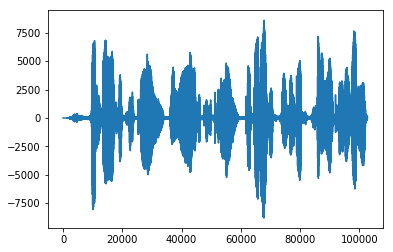

In [68]:
fs, data = wavfile.read('./data/data_v_7_stc/audio/speech_0001.wav')
plt.plot(data)

In [74]:
np.abs(data).mean()

1019.1757398753894

In [75]:
np.median(np.abs(data))

433.0

In [31]:
fs, data = wavfile.read('./data/data_v_7_stc/audio/background_0001_time_stretch_1.wav')

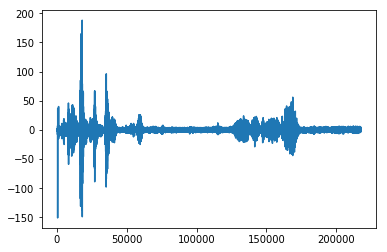

In [36]:
plt.plot(data)

In [37]:
c = fft(data)

/Users/toly/contests/mipt_hack/env/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


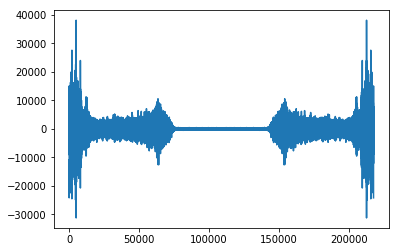

In [39]:
plt.plot(c)
plt.show()

160813.25907763166

/Users/toly/contests/mipt_hack/env/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


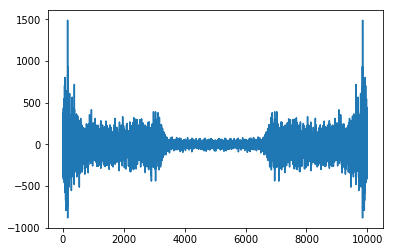

In [57]:
f = int(random.random() * (len(data) - 10000))
plt.plot(fft(data[f:f+10000]))
plt.show()

In [48]:
data[]

array([ 0, -1,  0, ...,  1,  1,  1], dtype=int16)